In [1]:
# import needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#### 1. Read the car dataset

In [3]:
# read the clean data

car_data = pd.read_csv("../data/car_data.csv")

car_data


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


#### 2. Subset the price and fuel consumption related information  

In [16]:
# Create a new dataframe with fuel consumption and price columns

cars_fuel_price = car_data[["MSRP", "highway MPG", "city mpg"]]

cars_fuel_price


,MSRP,highway MPG,city mpg
0,46135,26,19
1,40650,28,19
2,36350,28,20
3,29450,28,18
4,34500,28,18
...,...,...,...
11909,46120,23,16
11910,56670,23,16
11911,50620,23,16
11912,50920,23,16


#### 3. Check the distribution of data and standardize it if necessary

array([[<Axes: title={'center': 'MSRP'}>,
        <Axes: title={'center': 'highway MPG'}>],
       [<Axes: title={'center': 'city mpg'}>, <Axes: >]], dtype=object)

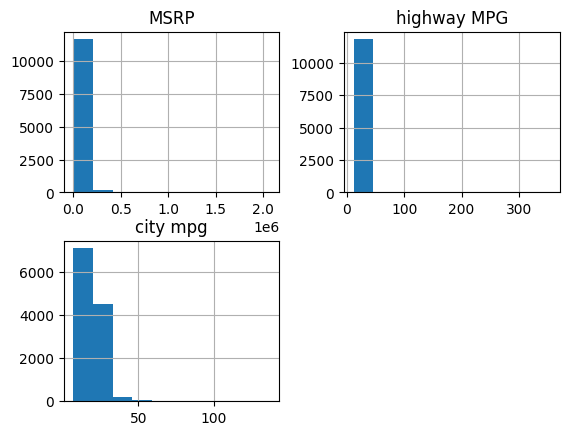

In [22]:
# Check the data distribution

cars_fuel_price.hist()

In [24]:
# Standardize the data

scaler = StandardScaler()
scaler.fit(cars_fuel_price)
cars_standardised = scaler.transform(cars_fuel_price)

cars_standardised

array([[ 0.09217398, -0.0719296 , -0.08158681],
       [ 0.00091942,  0.15373708, -0.08158681],
       [-0.07062017,  0.15373708,  0.02967982],
       ...,
       [ 0.16679144, -0.41042961, -0.41538668],
       [ 0.17178257, -0.41042961, -0.41538668],
       [-0.19298614, -0.0719296 , -0.30412006]])

In [25]:
cars_scaled = pd.DataFrame(cars_standardised, columns = cars_fuel_price.columns)

cars_scaled

,MSRP,highway MPG,city mpg
0,0.092174,-0.071930,-0.081587
1,0.000919,0.153737,-0.081587
2,-0.070620,0.153737,0.029680
3,-0.185416,0.153737,-0.192853
4,-0.101399,0.153737,-0.192853
...,...,...,...
11909,0.091924,-0.410430,-0.415387
11910,0.267446,-0.410430,-0.415387
11911,0.166791,-0.410430,-0.415387
11912,0.171783,-0.410430,-0.415387


array([[<Axes: title={'center': 'MSRP'}>,
        <Axes: title={'center': 'highway MPG'}>],
       [<Axes: title={'center': 'city mpg'}>, <Axes: >]], dtype=object)

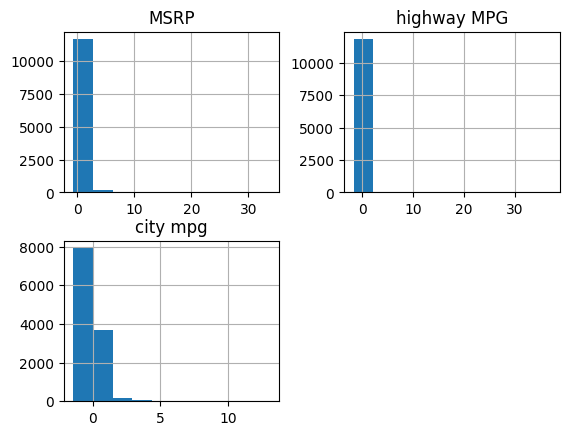

In [26]:
# Make a dataframe from the scaled data

cars_scaled.hist()

#### 4. Use the elbow method to determine the number of clusters

Text(0.5, 1.0, "Elbow Method showing the optimal 'Kay")

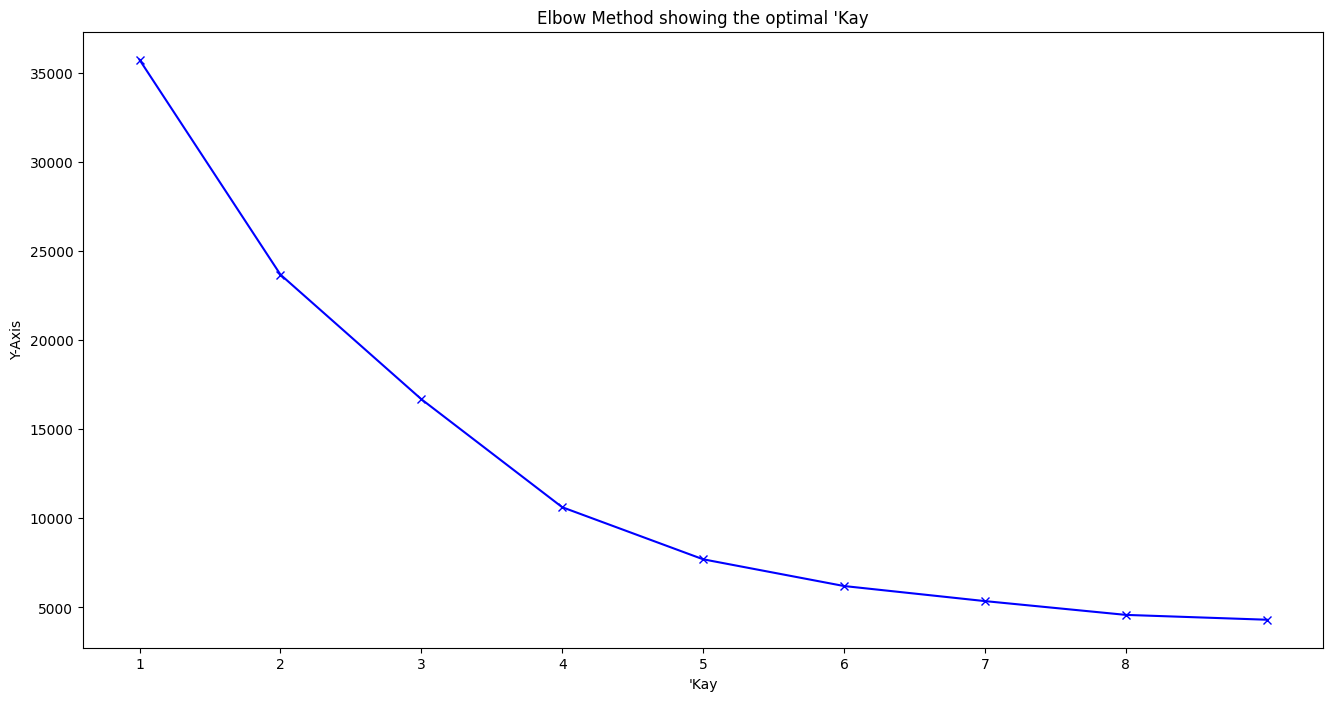

In [29]:
# Use the code from the encounter and adapt it to implement the elbow method

# K = range(1, 10) 

K = range(1, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(cars_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel("'Kay")
plt.ylabel("Y-Axis")
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title("Elbow Method showing the optimal 'Kay")


We can see a light elbow for k = 4 which fits our knowledge of the dataset.

#### 5. Repeat k-means clustering using the appropriate number of clusters selected from the elbow method. Visualize the results with a scatter plot.

In [30]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(cars_scaled)

clusters = kmeans.predict(cars_scaled)
cars_clustered = cars_scaled.copy() 
cars_clustered["cluster"] = clusters

cars_clustered

,MSRP,highway MPG,city mpg,cluster
0,0.092174,-0.071930,-0.081587,0
1,0.000919,0.153737,-0.081587,0
2,-0.070620,0.153737,0.029680,0
3,-0.185416,0.153737,-0.192853,0
4,-0.101399,0.153737,-0.192853,0
...,...,...,...,...
11909,0.091924,-0.410430,-0.415387,0
11910,0.267446,-0.410430,-0.415387,0
11911,0.166791,-0.410430,-0.415387,0
11912,0.171783,-0.410430,-0.415387,0


In [39]:
car_data["cluster"] = cars_clustered["cluster"]

In [41]:
car_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,cluster
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,0


<Axes: xlabel='Engine HP', ylabel='MSRP'>

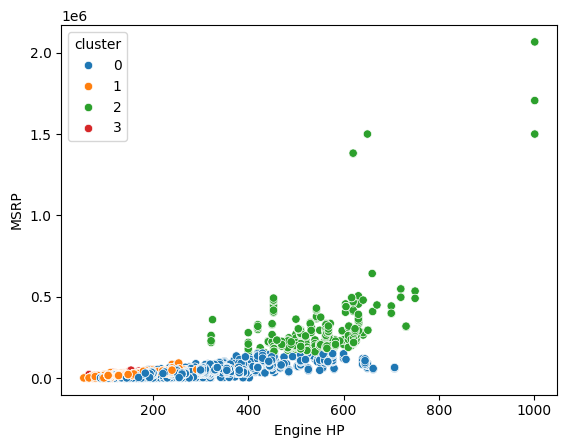

In [58]:
sns.scatterplot(data = car_data, x = "Engine HP", y = "MSRP", hue = "cluster", palette = "tab10")


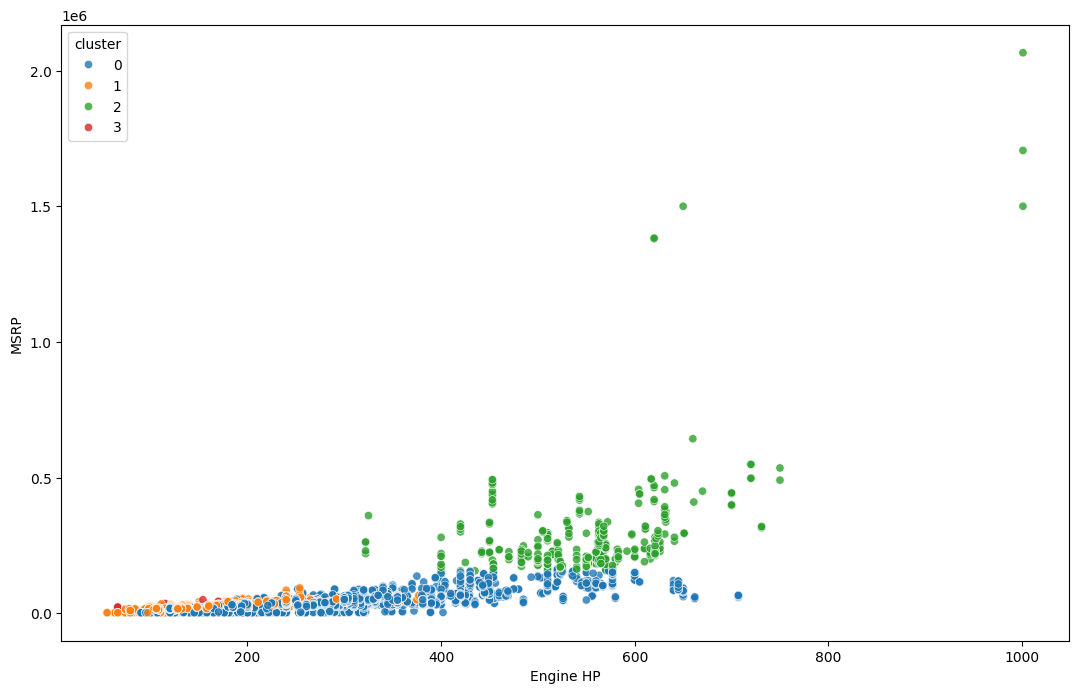

In [57]:
plt.subplots(figsize=(13,8))
sns.scatterplot(x="Engine HP", y="MSRP", hue="cluster", palette = "tab10",
            data=car_data, alpha=0.8,
            #style='Make', size='city mpg',
            #sizes=(5, 600)
            );

#### 6. What information can you provide regarding the various clusters?